# DATA SET:  insurance.xlsx 

### Author: Kranti Sambhaji Walke

# 1. Import the necessary libraries

About data:
The insurance.csv dataset contains 1338 observations and 7 attributes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   
import seaborn as sns
%matplotlib inline  
from scipy import stats

# 2. Read the data as a data frame

In [2]:
# Import dataset (Original Data)
# As CSV file don'nt have sheet name I have manually made insurance.csv to insurance.xlsx file
my_data=pd.read_excel("insurance.xlsx",sheet_name = 0)
my_data.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


#  3. Basic EDA

In [3]:
my_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


There are 6 independent features and the expenses column (dependent variable).

Independent variables are:

The age of the primary beneficiary

The sex (gender) of the primary beneficiary

The body mass index (BMI) of the primary beneficiary

The no. of children that the primary beneficiary has

Weather or not the primary beneficiary smokes

The region of the primary beneficiary.



# a. Shape of the data 

In [4]:
my_data.shape

(1338, 7)

1338 people enrolled as primary beneficiaries.

In [5]:
my_data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

#  b. Data type of each attribute

In [6]:
my_data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


Numeric Variables:-  Age, BMI, No. of children and Charges

Non-numeric Variables:- Sex,Smoking status and  Region


# Check for the null values

In [7]:
my_data.isnull().values.any()

False

# c. Checking the presence of missing values

In [8]:
val=my_data.isnull().values.any()

if val==True:
    print("Missing values present : ", my_data.isnull().values.sum())
    my_data=my_data.dropna()
else:
    print("No missing values present")

No missing values present


# d. 5 point summary of numerical attributes

In [9]:
my_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [10]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [11]:
#Find Shape
my_data.shape

(1338, 7)

In [12]:
#Find Mean
my_data.mean()

age            39.207025
bmi            30.663397
children        1.094918
charges     13270.422265
dtype: float64

In [13]:
#Find Median
my_data.median()

age           39.000
bmi           30.400
children       1.000
charges     9382.033
dtype: float64

In [14]:
#Find Standard Deviation
my_data.std()

age            14.049960
bmi             6.098187
children        1.205493
charges     12110.011237
dtype: float64

# Ploting histogram to check that if data columns are normal or almost normal or not
# e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.


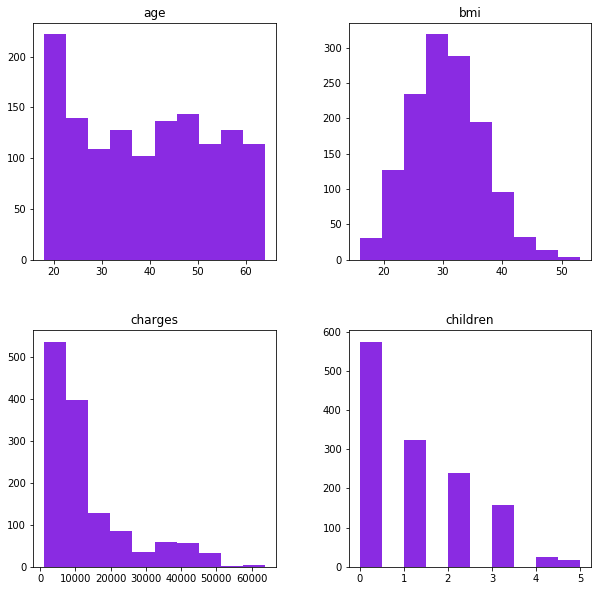

In [15]:
my_data.hist(figsize=(10,10),color="blueviolet",grid=False)
plt.show()

### The graph of bmi is almost normally distributed.

### The graph of charges and children are rightly skewed

# f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns along the index axis 

In [16]:
my_data.skew(axis = 0, skipna = True) 

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

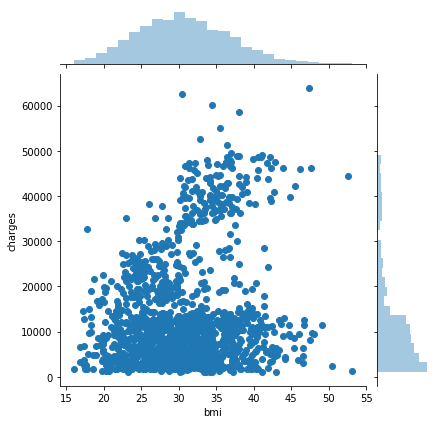

In [17]:
sns.jointplot(my_data['bmi'],my_data['charges'])

# g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns 

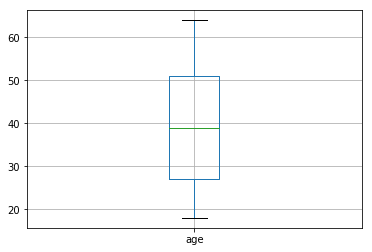

In [18]:
my_data.boxplot('age')

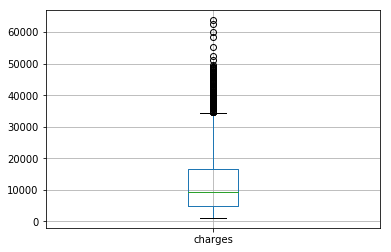

In [19]:
my_data.boxplot('charges')

### The outliers are present above chargesof 3500 Rs. And the charges are present actually between 1500 to 35000 Rs.

AxesSubplot(0.726087,0.15;0.173913x0.163043)
AxesSubplot(0.726087,0.15;0.173913x0.163043)
AxesSubplot(0.726087,0.15;0.173913x0.163043)


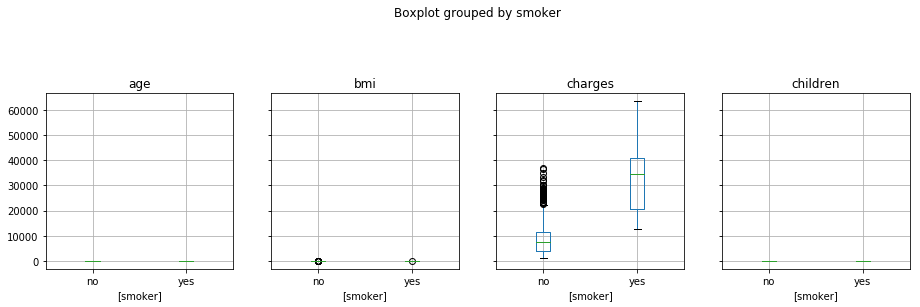

In [20]:
import matplotlib.pylab as plt

my_data.boxplot(by = 'smoker',  layout=(4,4), figsize=(15, 15))
print(my_data.boxplot('age'))
print(my_data.boxplot('bmi'))
print(my_data.boxplot('charges'))

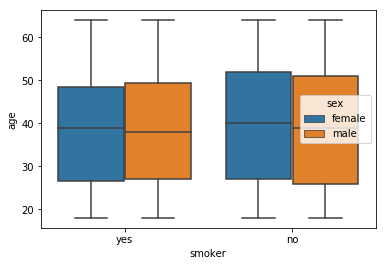

In [21]:
#boxplot
sns.boxplot(x="smoker",y="age",hue="sex", data=my_data)

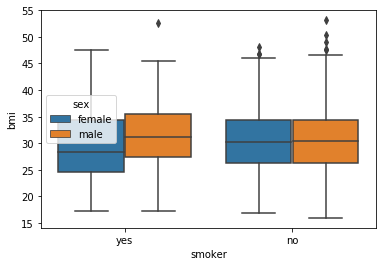

In [22]:
sns.boxplot(x="smoker",y="bmi",hue="sex", data=my_data)

## The BMI is almost same for both the genders.Also there are some outliers present who don't smoke between 45 to 55 kg/m^2 

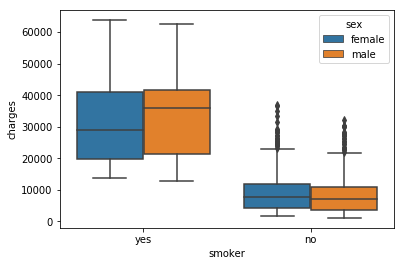

In [23]:
sns.boxplot(x="smoker",y="charges",hue="sex", data=my_data)

### The outliers are present above 10000Rs for non-smokers for both the genders. And there is not that much difference between charges of smokers for both the genders.

# h. Distribution of categorical columns (include children)

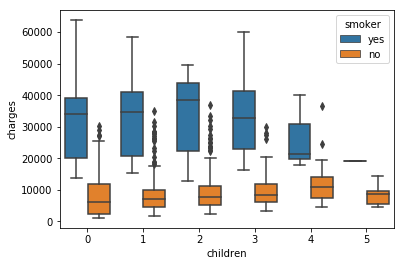

In [24]:
sns.boxplot(x = "children", y = "charges", hue = "smoker", data = my_data)

# h. Distribution of categorical columns

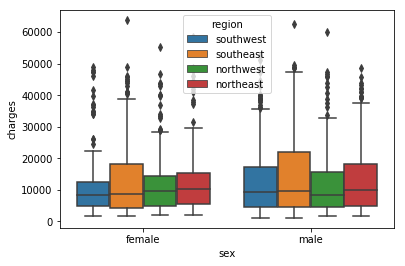

In [25]:
sns.boxplot(x = "sex", y = "charges", hue = "region", data = my_data)

### From the above graph I saw :
### Across southwest, northwest and northeast, the charges are rather similar. 
### Individuals from southeast has a wider range of charges for both sexes. 
### Each individual should be categorized as either from southeast or not from southeast region.
### Also the outliers are present in each region for both the sex 

Text(0.5, 1.0, 'Distribution of charges by age and smoker')

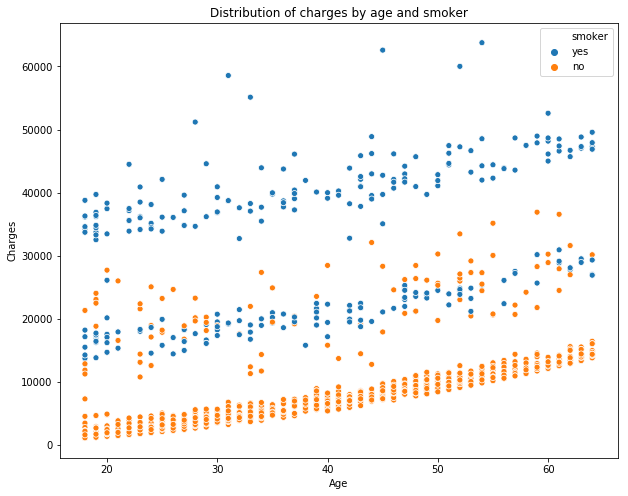

In [26]:
plt.figure(figsize = (10,8))
sns.scatterplot(x = "age", y = "charges",data =my_data, hue = "smoker")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.title("Distribution of charges by age and smoker")

### Here smokers are generally charge a much higher rate. 
### Usually the Charges above 30000 are from Smokers and below 15000 are  non-smokers. 

Text(0.5, 1.0, 'Distribution of charges by age and sex')

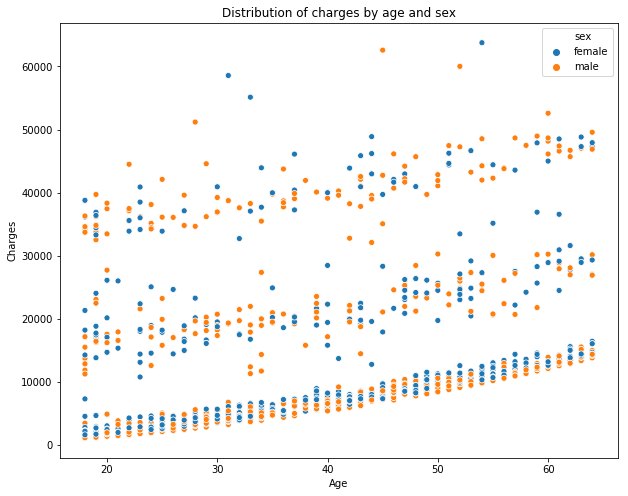

In [27]:
plt.figure(figsize = (10,8))
sns.scatterplot(x = "age", y = "charges",data =my_data, hue = "sex")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.title("Distribution of charges by age and sex")

### The charges are increasing with respect to age. 
### There is not big difference in charges for male vs female.


Text(0.5, 1.0, 'Distribution of charges by bmi and sex')

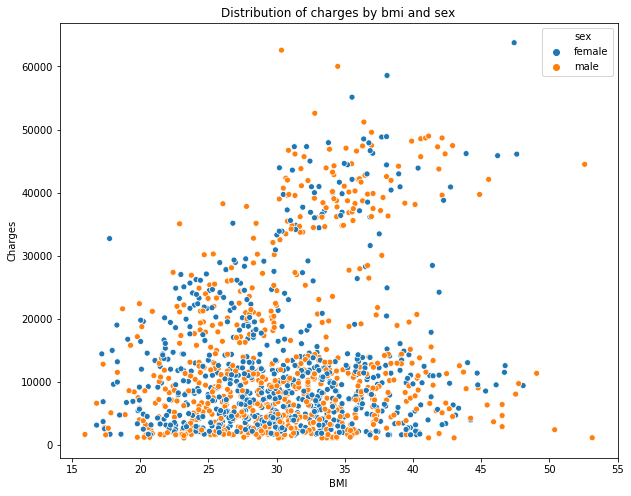

In [28]:
plt.figure(figsize = (10,8))
sns.scatterplot(x = "bmi", y = "charges",data =my_data, hue = "sex")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.title("Distribution of charges by bmi and sex")

Text(0.5, 1.0, 'Distribution of charges by bmi and smoker')

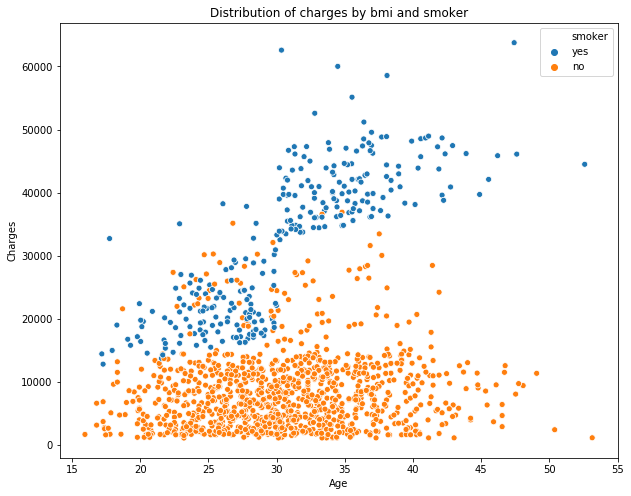

In [29]:
plt.figure(figsize = (10,8))
sns.scatterplot(x = "bmi", y = "charges",data =my_data, hue = "smoker")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.title("Distribution of charges by bmi and smoker")

### I think BMI is not that important feature to know wheather the person is Smoker or Not.
### Smoker tends to incur a much higher charge as compared to non-smoker. 
### When the BMI of a smoker goes beyond 30, the charges increases to a minimum of 30000. Non-smoker with BMI > 30 generally have charges incurred below 30000.


Text(0.5, 1.0, 'Distribution of charges by number of children')

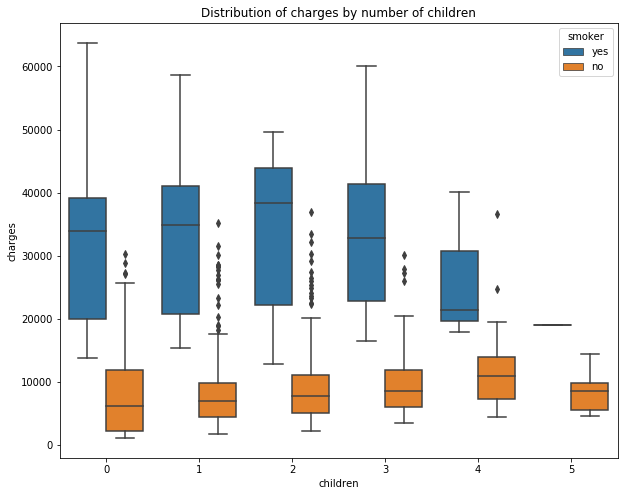

In [30]:
plt.figure(figsize = (10,8))
sns.boxplot(x = "children", y = "charges",hue = "smoker", data = my_data)
plt.title("Distribution of charges by number of children")

### Thre is a charges threshold. 
### Here smokers  make claims with minimum amount of approximately 15000 regardless of number of children whereeas non-smokers make a maximum claim of 20000 typically below 15000.

# i. Pair plot that includes all the columns of the data frame 

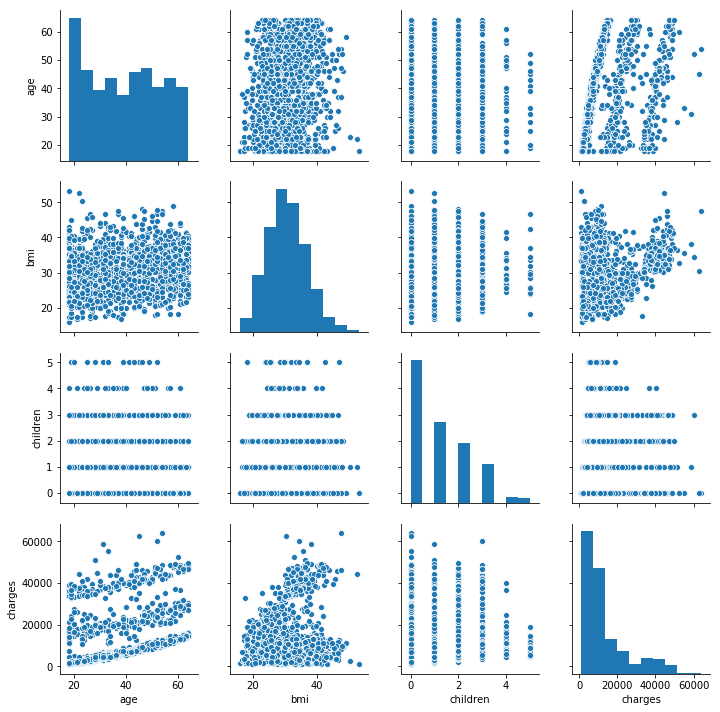

In [31]:
#sns.pairplot(my_data,hue="sex")
sns.pairplot(my_data)
plt.show()

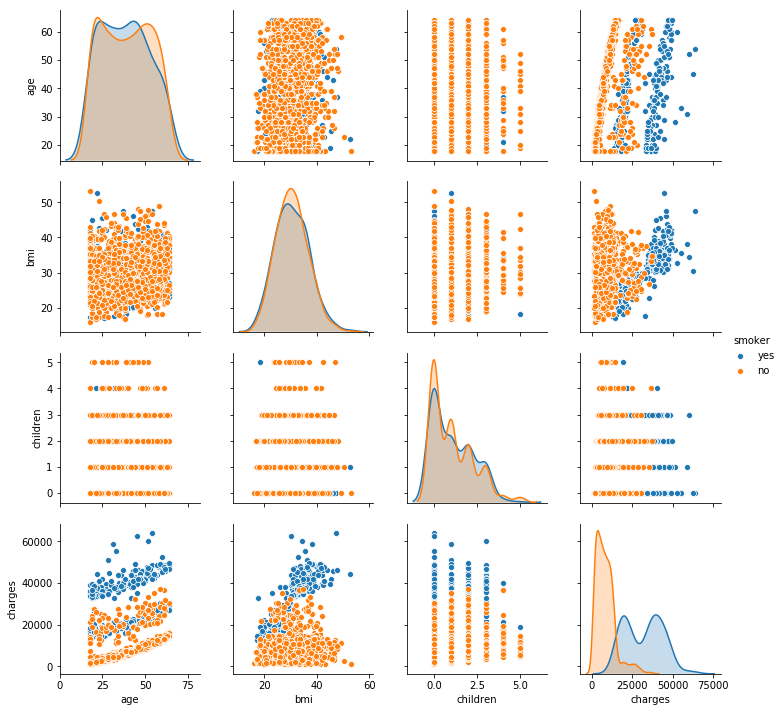

In [32]:
sns.pairplot(my_data,hue="smoker")
plt.show()

# Calculate the correlation matrix 

In [33]:
cor=my_data.corr()
cor

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


###  We can see from above there is no correlation between the different numerical features.


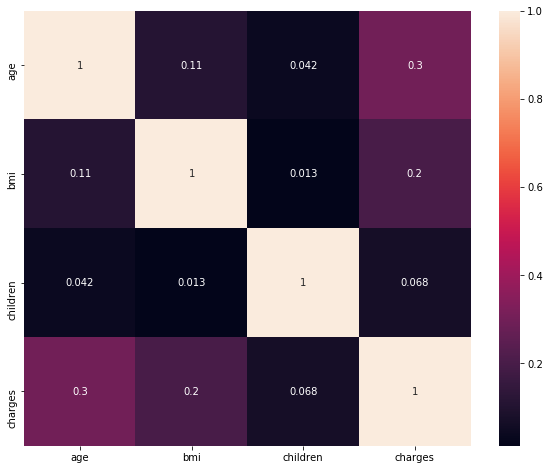

In [34]:
# heatmap
plt.subplots(figsize=(10,8))
sns.heatmap(cor,annot=True)

# Conclusion from EDA:

### 1. There are no null or missing values present in Dataset.
### 2. Non-smoker persons are slightly younger than smokers for both the genders.
### 3. Insurance cost for smokers is definitely more than non-smoker i.e range of charges for smokers is greater            (10000 to 20000Rs) than non-smoker(5000 to 10000Rs).
### 4. Across southwest, northwest and northeast, the charges are rather similar. 
### 5. Individuals from southeast has a wider range of charges for both genders. 
### 6. Also the outliers are present in each region for both the sex .
### 7. The charges are increasing with respect to age. 
### 8. There is not big difference in charges for male vs female.
### 9. The BMI is almost same for both the genders.Also there are some outliers present who don't smoke between 45 to 55 kg/m^2
### 10 .Here smokers  make claims with minimum amount of approximately 15000 regardless of number of children whereeas non-smokers make a maximum claim of 20000 typically below 15000.
### 11. BMI is almost normally distributed while The graphs Charges and childrens are Rightly skewed.
### 12.There is not that much relation between categorical variables.

# 4. Answers with statistical evidence

In [35]:
# Import dataset (Original Data)
# As CSV file don'nt have sheet name I have manually made it .xlsx file
DB=pd.read_excel("insurance.xlsx",sheet_name = 0)
DB.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [36]:
#Import dataset for:
#a. Do charges of people who smoke differ significantly from the people who don't?
DB1=pd.read_excel("insurance.xlsx",sheet_name = 1)
DB1.head(3)

,Smoker,NonSmoker
0,16884.9240,1725.55230
1,27808.7251,4449.46200
2,39611.7577,21984.47061


In [37]:
#Import dataset for:
#b. Does bmi of males differ significantly from that of females?
DB2=pd.read_excel("insurance.xlsx",sheet_name = 2)
DB2.head(3)

,MALE,FEMALE
0,33.770,27.90
1,33.000,25.74
2,22.705,33.44


In [38]:
#Import dataset for:
#c. Is the proportion of smokers significantly different in different genders?
DB3=pd.read_excel("insurance.xlsx",sheet_name = 3)
DB3.head(3)

,SMOKER,NON-SMOKER
0,female,male
1,female,male
2,male,male


In [39]:
#Import dataset for:
#d. Is the distribution of bmi across women with no children, one child and two children, the same ?
DB4=pd.read_excel("insurance.xlsx",sheet_name = 4)
DB4.head(3)

,NO Child,One Child,TWO Child
0,27.90,33.44,32.775
1,25.74,30.78,36.630
2,25.84,32.40,30.800


# Hypothesis

1. H0= Means are same

2. HA=Means are not same

# a. Do charges of people who smoke differ significantly from the people who don't?

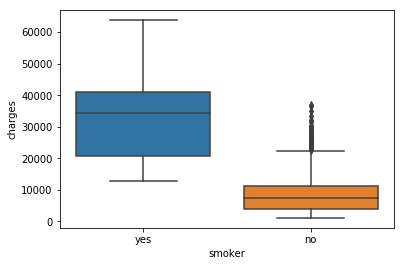

In [40]:
sns.boxplot(x = "smoker", y = "charges", data = DB)

In [41]:
#As The No.of Rows(No.of Sample for Charges of Smoker and Non-Smoker) were not same I have cleaned the data manually in excel sheet.
DB1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 2 columns):
Smoker       1064 non-null float64
NonSmoker    1064 non-null float64
dtypes: float64(2)
memory usage: 16.7 KB


## T-test 
### Hypothesis:

1. H0= charges of people who smoke differ significantly from the people who don't 

2. HA= charges of people who smoke are similar to people who don't

In [42]:
from scipy.stats import ttest_ind, levene, shapiro, iqr
t,p = ttest_ind(DB1['Smoker'],DB1['NonSmoker'])
print(t,p)

if p < 0.05:
    print("Use this p-value to reject the null hypothesis at 5% significance level i.e Accept HA")
    print("Charges of people who smoke are similar to people who don't")
else:
    print("Accept the H0")
    print("Charges of people who smoke differ significantly from the people who don't ")

-0.36096906928575606 0.718158433417927
Accept the H0
Charges of people who smoke differ significantly from the people who don't 


## Here p-value > 0.05 ,so we accept  Ho.So we conclude that charges of people who smoke differ significantly from the people who don't.

## Also we can see in the boxplot  of smoker Vs charges,it's clear that charges of people who smoke differ significantly from the people who don't.

# b. Does bmi of males differ significantly from that of females? 

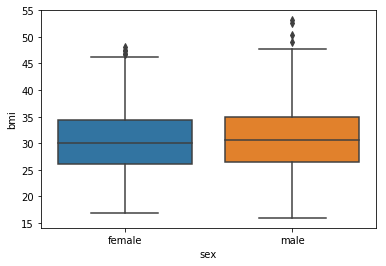

In [43]:
sns.boxplot(x = "sex", y = "bmi", data = DB)

In [44]:
#As The No.of Rows(No.of Sample for BMI of MALE and FEALE) were not same I have cleaned the data manually in excel sheet.
DB2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 2 columns):
MALE      676 non-null float64
FEMALE    676 non-null float64
dtypes: float64(2)
memory usage: 10.6 KB


## ANOVA test
### Hypothesis:

1. H0= bmi of males differ significantly from that of females 
2. HA= bmi of male is similar to that of females


In [45]:
from scipy import stats

f,p=stats.f_oneway(DB2['MALE'],DB2['FEMALE'])

print("F Value= ",f)

print("P-Value= ",p)

if p < 0.05:
    print("Use this p-value to reject the null hypothesis at 5% significance level i.e Accept HA")
    print("BMI of male is similar to that of females")
else:
    print("Accept the H0")
    print("BMI of males differ significantly from that of females")

F Value=  10.456389808107714
P-Value=  0.0012518224907116183
Use this p-value to reject the null hypothesis at 5% significance level i.e Accept HA
BMI of male is similar to that of females


## Here p-value < 0.05 ,so we accept HA and reject Ho.So we conclude that bmi of male is similar to that of females.

## Also we can see in the boxplot  of bmi Vs sex,it's clear that bmi of male is similar to that of females.

# c. Is the proportion of smokers significantly different in different genders?

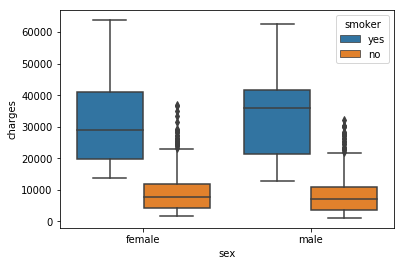

In [46]:
sns.boxplot(x = "sex", y = "charges", hue = "smoker", data = my_data)

## CHI SQ test
### Hypothesis:

1. H0= The proportion of smokers significantly different in different genders
2. HA= The proportion of smokers is similar in different genders

In [47]:
from scipy.stats import chisquare,chi2_contingency
chisquare(my_data["sex"].value_counts())

Power_divergenceResult(statistic=0.14648729446935724, pvalue=0.7019150843224216)

In [48]:
if p < 0.05:
    print("Use this p-value to reject the null hypothesis at 5% significance level i.e Accept HA")
    print("The proportion of smokers is similar in different genders")
else:
    print("Accept the H0")
    print("The proportion of smokers significantly different in different genders")

Use this p-value to reject the null hypothesis at 5% significance level i.e Accept HA
The proportion of smokers is similar in different genders


In [49]:
chisquare(my_data["smoker"].value_counts())

Power_divergenceResult(statistic=466.4424514200299, pvalue=1.9051250973839812e-103)

In [50]:
chi=pd.crosstab(my_data["sex"],my_data["smoker"])

In [51]:
chi

smoker,no,yes
sex,,
female,547,115
male,517,159


## Here p-value > 0.05 ,so we accept HA and reject Ho.So we conclude that The proportion of smokers significantly different in different genders.

## Also we can see in the boxplot  of bmi Vs sex,it's clear that The proportion of smokers significantly different in different genders.

# d. Is the distribution of bmi across women with no children, one child and two children, the same ?

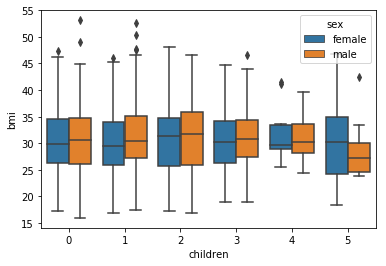

In [52]:
sns.boxplot(x = "children", y = "bmi", hue= "sex", data = DB)

In [53]:
#As The No.of Rows(No.of Sample for Women having child or not) were not same I have cleaned the data manually in excel sheet.
DB4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 3 columns):
NO Child     119 non-null float64
One Child    119 non-null float64
TWO Child    119 non-null float64
dtypes: float64(3)
memory usage: 2.9 KB


## ANOVA test
### Hypothesis:

1. H0= distribution of bmi across women with no children, one child and two children, the same 
2. HA= distribution of bmi across women with no children, one child and two children, is not same


In [54]:
from scipy import stats

f,p=stats.f_oneway(DB4['NO Child'],DB4['One Child'],DB4['TWO Child'])

print("F Value= ",f)
print("P-Value= ",p)

if p < 0.05:
    print("Use this p-value to reject the null hypothesis at 5% significance level i.e Accept HA")
    print("Distribution of BMI across women with no children, one child and two children, is not same")
else:
    print("Accept the H0")
    print("Distribution of BMI across women with no children, one child and two children, the same ")

F Value=  0.38591693989402603
P-Value=  0.6801126458415663
Accept the H0
Distribution of BMI across women with no children, one child and two children, the same 


## Here p-value > 0.05 ,so we accept HA and reject Ho.So we conclude that Distribution of BMI across women with no children, one child and two children, the same .

## Also we can see in the boxplot  of bmi Vs sex,it's clear that Distribution of BMI across women with no children, one child and two children, the same .